#Import dataset

In [1]:
import pandas as pd

data_name = 'sample_data/Phishing_Email.csv'
path = '/content/sample_data/Phishing_Email.csv'
data = pd.read_csv('/content/Phishing_Email.csv')

print(data.head())

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


In [2]:
# Drop rows where 'Email Text' is 'empty' or NaN
data_cleaned = data.dropna(subset=['Email Text'])  # Remove rows with NaN
data_cleaned = data_cleaned[data_cleaned['Email Text'] != 'empty']  # Remove rows with 'empty'

print(data_cleaned)


       Unnamed: 0                                         Email Text  \
0               0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1               1  the other side of * galicismos * * galicismo *...   
2               2  re : equistar deal tickets are you still avail...   
3               3  \nHello I am your hot lil horny toy.\n    I am...   
4               4  software at incredibly low prices ( 86 % lower...   
...           ...                                                ...   
18644       18645  \nRick Moen  a Ã©crit:> > I'm confused. I thou...   
18645       18646  date a lonely housewife always wanted to date ...   
18646       18647  request submitted : access request for anita ....   
18647       18648  re : important - prc mtg hi dorn & john , as y...   
18648       18649  press clippings - letter on californian utilit...   

           Email Type  
0          Safe Email  
1          Safe Email  
2          Safe Email  
3      Phishing Email  
4      Phishing

In [ ]:
print(data['Email Type'].unique())

['Safe Email' 'Phishing Email']


#Preprocessing for BERT models

In [3]:
! pip install datasets
from datasets import Dataset
from sklearn.metrics import classification_report
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
# Map labels
data_cleaned['Email Type'] = data_cleaned['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

labels = ['Safe Email' 'Phishing Email']

train_data = Dataset.from_pandas(data_cleaned.head(5000))
eval_data = Dataset.from_pandas(data_cleaned.tail(500))


In [5]:
data_cleaned.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,1,the other side of * galicismos * * galicismo *...,0
2,2,re : equistar deal tickets are you still avail...,0
3,3,\nHello I am your hot lil horny toy.\n I am...,1
4,4,software at incredibly low prices ( 86 % lower...,1


In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
tokenizer_1 = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenizer_2 = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_function_distil(examples):
    return tokenizer(examples["Email Text"], padding="max_length", truncation=True)

def tokenize_function_bert(examples):
    return tokenizer_1(examples["Email Text"], padding="max_length", truncation=True)

def tokenize_function_roberta(examples):
    return tokenizer_2(examples["Email Text"], padding="max_length", truncation=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-cased", num_labels=2)

model1 = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model2 = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
import os
import wandb
os.environ["WANDB_DISABLED"] = "true"

#ROBERTA

In [ ]:
train_dataset_roberta = train_data.map(tokenize_function_roberta, batched=True).shuffle(seed=42)
eval_dataset_roberta = eval_data.map(tokenize_function_roberta, batched=True)

# Rename 'Email Type' column to 'labels' for Hugging Face Trainer compatibility
train_dataset_roberta = train_dataset_roberta.rename_column("Email Type", "labels")
eval_dataset_roberta = eval_dataset_roberta.rename_column("Email Type", "labels")

# Set format for PyTorch with the correct columns
train_dataset_roberta.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
eval_dataset_roberta.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  eval_strategy="epoch",
                                  logging_strategy="epoch",  # Log training loss at regular intervals
                                  per_device_train_batch_size=11, # Batch size for training
                                  per_device_eval_batch_size=11, # Batch size for evaluation
                                  num_train_epochs=5,
                                  save_strategy="no",
                                  learning_rate = 1e-5
)

trainer = Trainer(
    model=model2,
    args=training_args,
    train_dataset=train_dataset_roberta,
    eval_dataset=eval_dataset_roberta)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.177100,0.139172
2,0.060400,0.083129
3,0.026500,0.070481
4,0.006500,0.096073
5,0.003600,0.099071


TrainOutput(global_step=2275, training_loss=0.05484511558826153, metrics={'train_runtime': 2724.5354, 'train_samples_per_second': 9.176, 'train_steps_per_second': 0.835, 'total_flos': 6577776384000000.0, 'train_loss': 0.05484511558826153, 'epoch': 5.0})

In [ ]:
# Make predictions
predictions = trainer.predict(eval_dataset_roberta)

# Convert logits to predicted labels
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = eval_data["Email Type"]

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Safe Email', 'Phishing Email']))

                precision    recall  f1-score   support

    Safe Email       0.98      0.99      0.99       313
Phishing Email       0.99      0.97      0.98       187

      accuracy                           0.99       500
     macro avg       0.99      0.98      0.99       500
  weighted avg       0.99      0.99      0.99       500



#distilBERT

In [12]:
train_dataset_distil = train_data.map(tokenize_function_distil, batched=True).shuffle(seed=42)
eval_dataset_distil = eval_data.map(tokenize_function_distil, batched=True)

# Rename 'Email Type' column to 'labels' for Hugging Face Trainer compatibility
train_dataset_distil = train_dataset_distil.rename_column("Email Type", "labels")
eval_dataset_distil = eval_dataset_distil.rename_column("Email Type", "labels")

# Set format for PyTorch with the correct columns
train_dataset_distil.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
eval_dataset_distil.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [13]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  eval_strategy="epoch",
                                  logging_strategy="epoch",
                                  per_device_train_batch_size=18, # Batch size for training
                                  per_device_eval_batch_size=18, # Batch size for evaluation
                                  num_train_epochs=5,
                                  save_strategy="no",
                                  learning_rate = 1e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_distil,
    eval_dataset=eval_dataset_distil)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [14]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.244500,0.138759
2,0.065800,0.082639
3,0.034300,0.080035
4,0.017400,0.074740
5,0.009100,0.072176


TrainOutput(global_step=1390, training_loss=0.07422916700514101, metrics={'train_runtime': 1396.2157, 'train_samples_per_second': 17.906, 'train_steps_per_second': 0.996, 'total_flos': 3311684966400000.0, 'train_loss': 0.07422916700514101, 'epoch': 5.0})

In [15]:
# Make predictions
predictions = trainer.predict(eval_dataset_distil)

# Convert logits to predicted labels
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = eval_data["Email Type"]

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Safe Email', 'Phishing Email']))

                precision    recall  f1-score   support

    Safe Email       0.98      0.99      0.99       313
Phishing Email       0.98      0.97      0.98       187

      accuracy                           0.98       500
     macro avg       0.98      0.98      0.98       500
  weighted avg       0.98      0.98      0.98       500



#BERT

In [16]:
train_dataset_bert = train_data.map(tokenize_function_bert, batched=True).shuffle(seed=42)
eval_dataset_bert = eval_data.map(tokenize_function_bert, batched=True)

# Rename 'Email Type' column to 'labels' for Hugging Face Trainer compatibility
train_dataset_bert = train_dataset_bert.rename_column("Email Type", "labels")
eval_dataset_bert = eval_dataset_bert.rename_column("Email Type", "labels")

# Set format for PyTorch with the correct columns
train_dataset_bert.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
eval_dataset_bert.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [20]:
training_args = TrainingArguments(output_dir="test_trainer",
                                  eval_strategy="epoch",
                                  logging_strategy="epoch",
                                  per_device_train_batch_size=30, # Batch size for training
                                  per_device_eval_batch_size=30, # Batch size for evaluation
                                  num_train_epochs=5,
                                  save_strategy="no",
                                  learning_rate = 1e-5
)

trainer = Trainer(
    model=model1,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=eval_dataset_bert)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [21]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.217600,0.120062
2,0.057300,0.056117
3,0.023500,0.045186
4,0.006600,0.036611
5,0.003800,0.043982


TrainOutput(global_step=835, training_loss=0.061749706653777714, metrics={'train_runtime': 2559.951, 'train_samples_per_second': 9.766, 'train_steps_per_second': 0.326, 'total_flos': 6577776384000000.0, 'train_loss': 0.061749706653777714, 'epoch': 5.0})

In [22]:
# Make predictions
predictions = trainer.predict(eval_dataset_bert)

# Convert logits to predicted labels
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = eval_data["Email Type"]

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Safe Email', 'Phishing Email']))

                precision    recall  f1-score   support

    Safe Email       0.99      0.99      0.99       313
Phishing Email       0.99      0.98      0.99       187

      accuracy                           0.99       500
     macro avg       0.99      0.99      0.99       500
  weighted avg       0.99      0.99      0.99       500



Try to do some different techniques on BERT and some different finetuning techniques

#Visualisation

In [ ]:
#Roberta

roberta_epoch_val = [0.139172, 0.083129, 0.070481, 0.096073, 0.099071]

roberta_epoch_test = [0.177100, 0.060400, 0.026500, 0.006500, 0.003600]

#distilBERT

distil_epoch_val = [0.138759, 0.082639, 0.080035, 0.074740, 0.072176]

distil_epoch_test = [0.244500, 0.065800, 0.034300, 0.017400, 0.009100]

#Bert

bert_epoch_val = [0.120062, 0.056117, 0.045186, 0.036611, 0.043982]

bert_epoch_test = [0.217600, 0.057300, 0.023500, 0.006600, 0.003800]


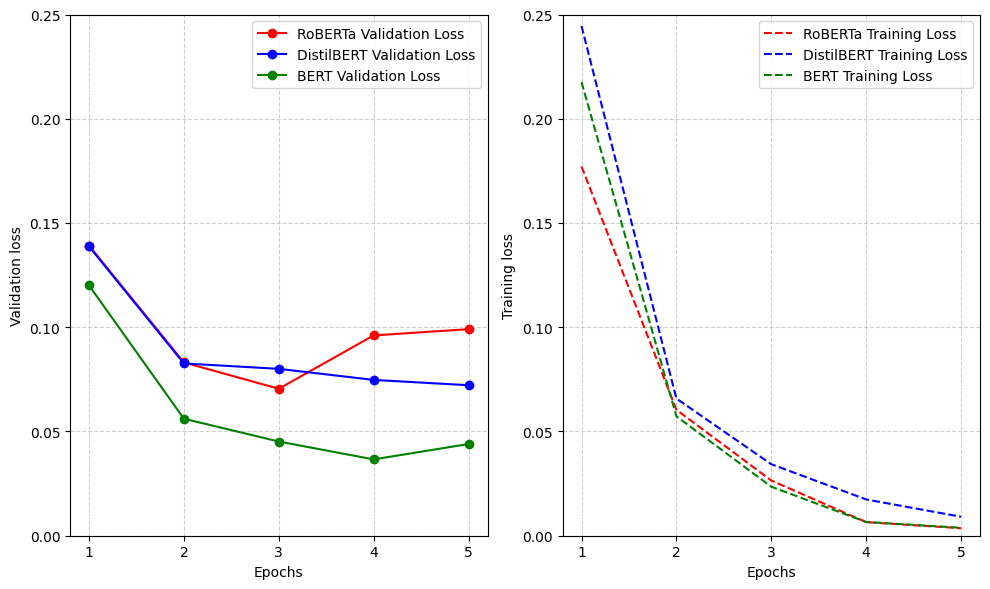

In [11]:
import matplotlib.pyplot as plt

# Data for plotting
epochs = [1, 2, 3, 4, 5]

# RoBERTa
roberta_epoch_val = [0.139172, 0.083129, 0.070481, 0.096073, 0.099071]
roberta_epoch_test = [0.177100, 0.060400, 0.026500, 0.006500, 0.003600]

# DistilBERT
distil_epoch_val = [0.138759, 0.082639, 0.080035, 0.074740, 0.072176]
distil_epoch_test = [0.244500, 0.065800, 0.034300, 0.017400, 0.009100]

# BERT
bert_epoch_val = [0.120062, 0.056117, 0.045186, 0.036611, 0.043982]
bert_epoch_test = [0.217600, 0.057300, 0.023500, 0.006600, 0.003800]

# Create a figure with two subplots
plt.figure(figsize=(10, 6))

# First subplot: RoBERTa validation and training loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
# Validation losses
plt.plot(epochs, roberta_epoch_val, label="RoBERTa Validation Loss", color='red', marker="o")
plt.plot(epochs, distil_epoch_val, label="DistilBERT Validation Loss", color='blue', marker="o")
plt.plot(epochs, bert_epoch_val, label="BERT Validation Loss", color='green', marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Validation loss")
plt.ylim(0.0, 0.25)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Second subplot: DistilBERT validation and training loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(epochs, roberta_epoch_test, label="RoBERTa Training Loss", color='red', linestyle="--")
plt.plot(epochs, distil_epoch_test, label="DistilBERT Training Loss", color='blue', linestyle="--")
plt.plot(epochs, bert_epoch_test, label="BERT Training Loss", color='green', linestyle="--")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Training loss")
plt.ylim(0.0, 0.25)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show
plt.tight_layout()
plt.show()


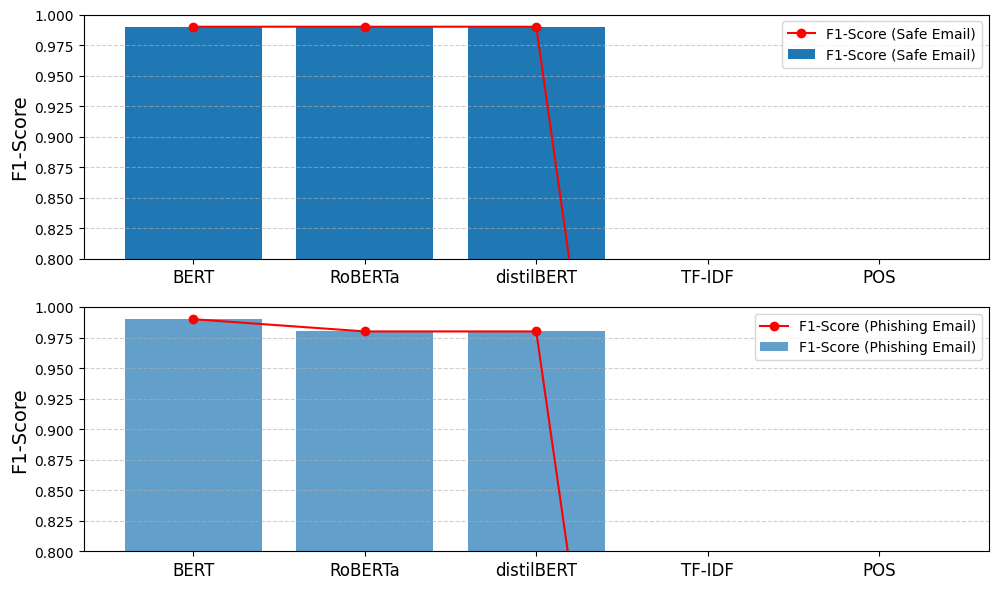

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with actual results from your classification reports)
models = ["BERT", "RoBERTa", "distilBERT", "TF-IDF", "POS"]

# Metrics for each class (Safe Email and Phishing Email)
precision_safe = [0.99, 0.98, 0.98, 0, 0]
recall_safe = [0.99, 0.99, 0.99, 0, 0]
f1_safe = [0.99, 0.99, 0.99, 0, 0]

precision_phishing = [0.99, 0.99, 0.98, 0, 0]
recall_phishing = [0.98, 0.97, 0.97, 0, 0]
f1_phishing = [0.99, 0.98, 0.98, 0, 0]

# Plotting
x = np.arange(len(models))  # X-axis positions

plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
# Safe Email metrics
#plt.bar(models, precision_safe, label="Precision (Safe Email)")
#plt.bar(models, recall_safe, label="Recall (Safe Email)")
plt.bar(models, f1_safe, label="F1-Score (Safe Email)")
plt.plot(models, f1_safe, label="F1-Score (Safe Email)", marker="o", color="red")

# Customization
plt.xticks(models, fontsize=12)
plt.ylabel("F1-Score", fontsize=14)
plt.ylim(0.8, 1.0)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.subplot(2,1,2)

# Phishing Email metrics
#plt.bar(models, precision_phishing, label="Precision (Phishing Email)", alpha=0.7)
#plt.bar(models, recall_phishing, label="Recall (Phishing Email)", alpha=0.7)
plt.bar(models, f1_phishing, label="F1-Score (Phishing Email)", alpha=0.7)
plt.plot(models, f1_phishing, label="F1-Score (Phishing Email)", marker="o", color="red")


# Customization
plt.xticks(models, fontsize=12)
plt.ylabel("F1-Score", fontsize=14)
plt.ylim(0.8, 1.0)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()


The differences in validation loss between BERT and RoBERTa are likely due to batch size, overfitting in RoBERTa, and stochastic factors. Adjusting RoBERTa's training settings, especially the batch size and applying early stopping, can help mitigate overfitting and bring its performance closer to BERT.